In [1]:
# imports
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def get_K(bvec):
    K = bvec.sum()
    return K

def get_L(nvec):
    L = nvec.sum()
    return L

def get_w(K, L, A, alpha):
    w = (1 - alpha) * A * (K / L) ** alpha
    return w

def get_r(K, L, A, alpha, delta):
    r = alpha * A * (L / K) ** (1 - alpha) - delta
    return r

def EulerFunc(bvec, *args):
    sigma, beta, nvec, A, alpha, delta = args
    b1 = 0
    b2 = bvec[0]
    b3 = bvec[1]
    K = get_K(bvec)
    L = get_L(nvec)
    r = get_r(K, L, A, alpha, delta)
    w = get_w(K, L, A, alpha)
    c1 = w * nvec[0] + (1 + r) * b1 - b2
    c2 = w * nvec[1] + (1 + r) * b2 - b3
    c3 = w * nvec[2] + (1 + r) * b3
    MU_c1 = c1 ** -sigma
    MU_c2 = c2 ** -sigma
    MU_c3 = c3 ** -sigma
    error1 = MU_c1 - beta * (1 + r) * MU_c2  # eq'n 2.12
    error2 = MU_c2 - beta * (1 + r) * MU_c3  # eq'n 2.14
    errors = np.array([error1, error2])
    return errors  # this is our zero condition

In [10]:
# Setting parameter values
sigma = 3.0
beta_annual = 0.99
beta = beta_annual ** 20
nvec = np.array([1.0, 1.0, 0.2])
A = 1.0
alpha = 0.35
delta_annual = 0.05
delta = 1 - (1 - delta_annual) ** 20

In [11]:
# Solve for the SS of the model
bvec_init = np.array([0.1, 0.1])
euler_args = (sigma, beta, nvec, A, alpha, delta)
results_b = opt.root(EulerFunc, bvec_init, args=(euler_args))
print('Optimal savings is = ', results_b.x)
b_ss = results_b.x
K_ss = get_K(b_ss) 
L_ss = get_L(nvec)
r_ss = get_r(K_ss, L_ss, A, alpha, delta)
w_ss = get_w(K_ss, L_ss, A, alpha)
print('SS interest rate = ', r_ss)
print('SS wage rate = ', w_ss)

Optimal savings is =  [0.05202465 0.12001847]
SS interest rate =  1.192820406810847
SS wage rate =  0.2664026124737178


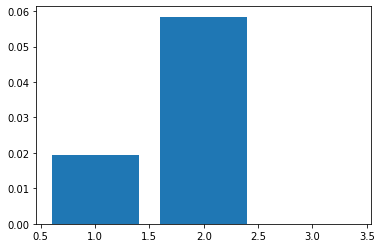

In [9]:
age = np.array([1, 2, 3])
b_sp1_ss = np.append(b_ss, 0.0)
plt.bar(age, b_sp1_ss)
plt.show()

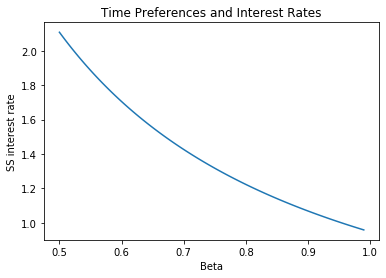

In [12]:
# Let's see how the interest rates respond to
# changes in time preference
N = 100  # the number of different betas to look at
beta_values = np.linspace(0.5, 0.99, N)
r_results = np.zeros(N)
for i in range(N):
    euler_args = (sigma, beta_values[i], nvec, A, alpha, delta)
    results_b = opt.root(EulerFunc, bvec_init, args=(euler_args))
    b_ss = results_b.x
    K_ss = get_K(b_ss)
    L_ss = get_L(nvec)
    r_ss = get_r(K_ss, L_ss, A, alpha, delta)
    r_results[i] = r_ss

plt.plot(beta_values, r_results)
plt.title('Time Preferences and Interest Rates')
plt.xlabel('Beta')
plt.ylabel('SS interest rate')
plt.show()